# English Tweet Visualisation

This notebook contains the visualisations of English tweets in OffenseEval 2020.

In [1]:
import pandas as pd

full = pd.read_csv("data/English/olid-training-v1.0.tsv", sep='\t')

full[:10]

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN
5,97670,@USER Liberals are all Kookoo !!!,OFF,TIN,OTH
6,77444,@USER @USER Oh noes! Tough shit.,OFF,UNT,NaN
7,52415,@USER was literally just talking about this lo...,OFF,TIN,GRP
8,45157,@USER Buy more icecream!!!,NOT,NaN,NaN
9,13384,@USER Canada doesn’t need another CUCK! We alr...,OFF,TIN,IND


In [2]:
from visualisation import plot_data

plot_data(full, "subtask_a")

In [3]:
from visualisation import plot_word_cloud

NOT_OFFENSIVE = full[(full['subtask_a'] == 'NOT')]
OFFENSE = full[(full['subtask_a'] == 'OFF')]


word cloud for not offensive posts

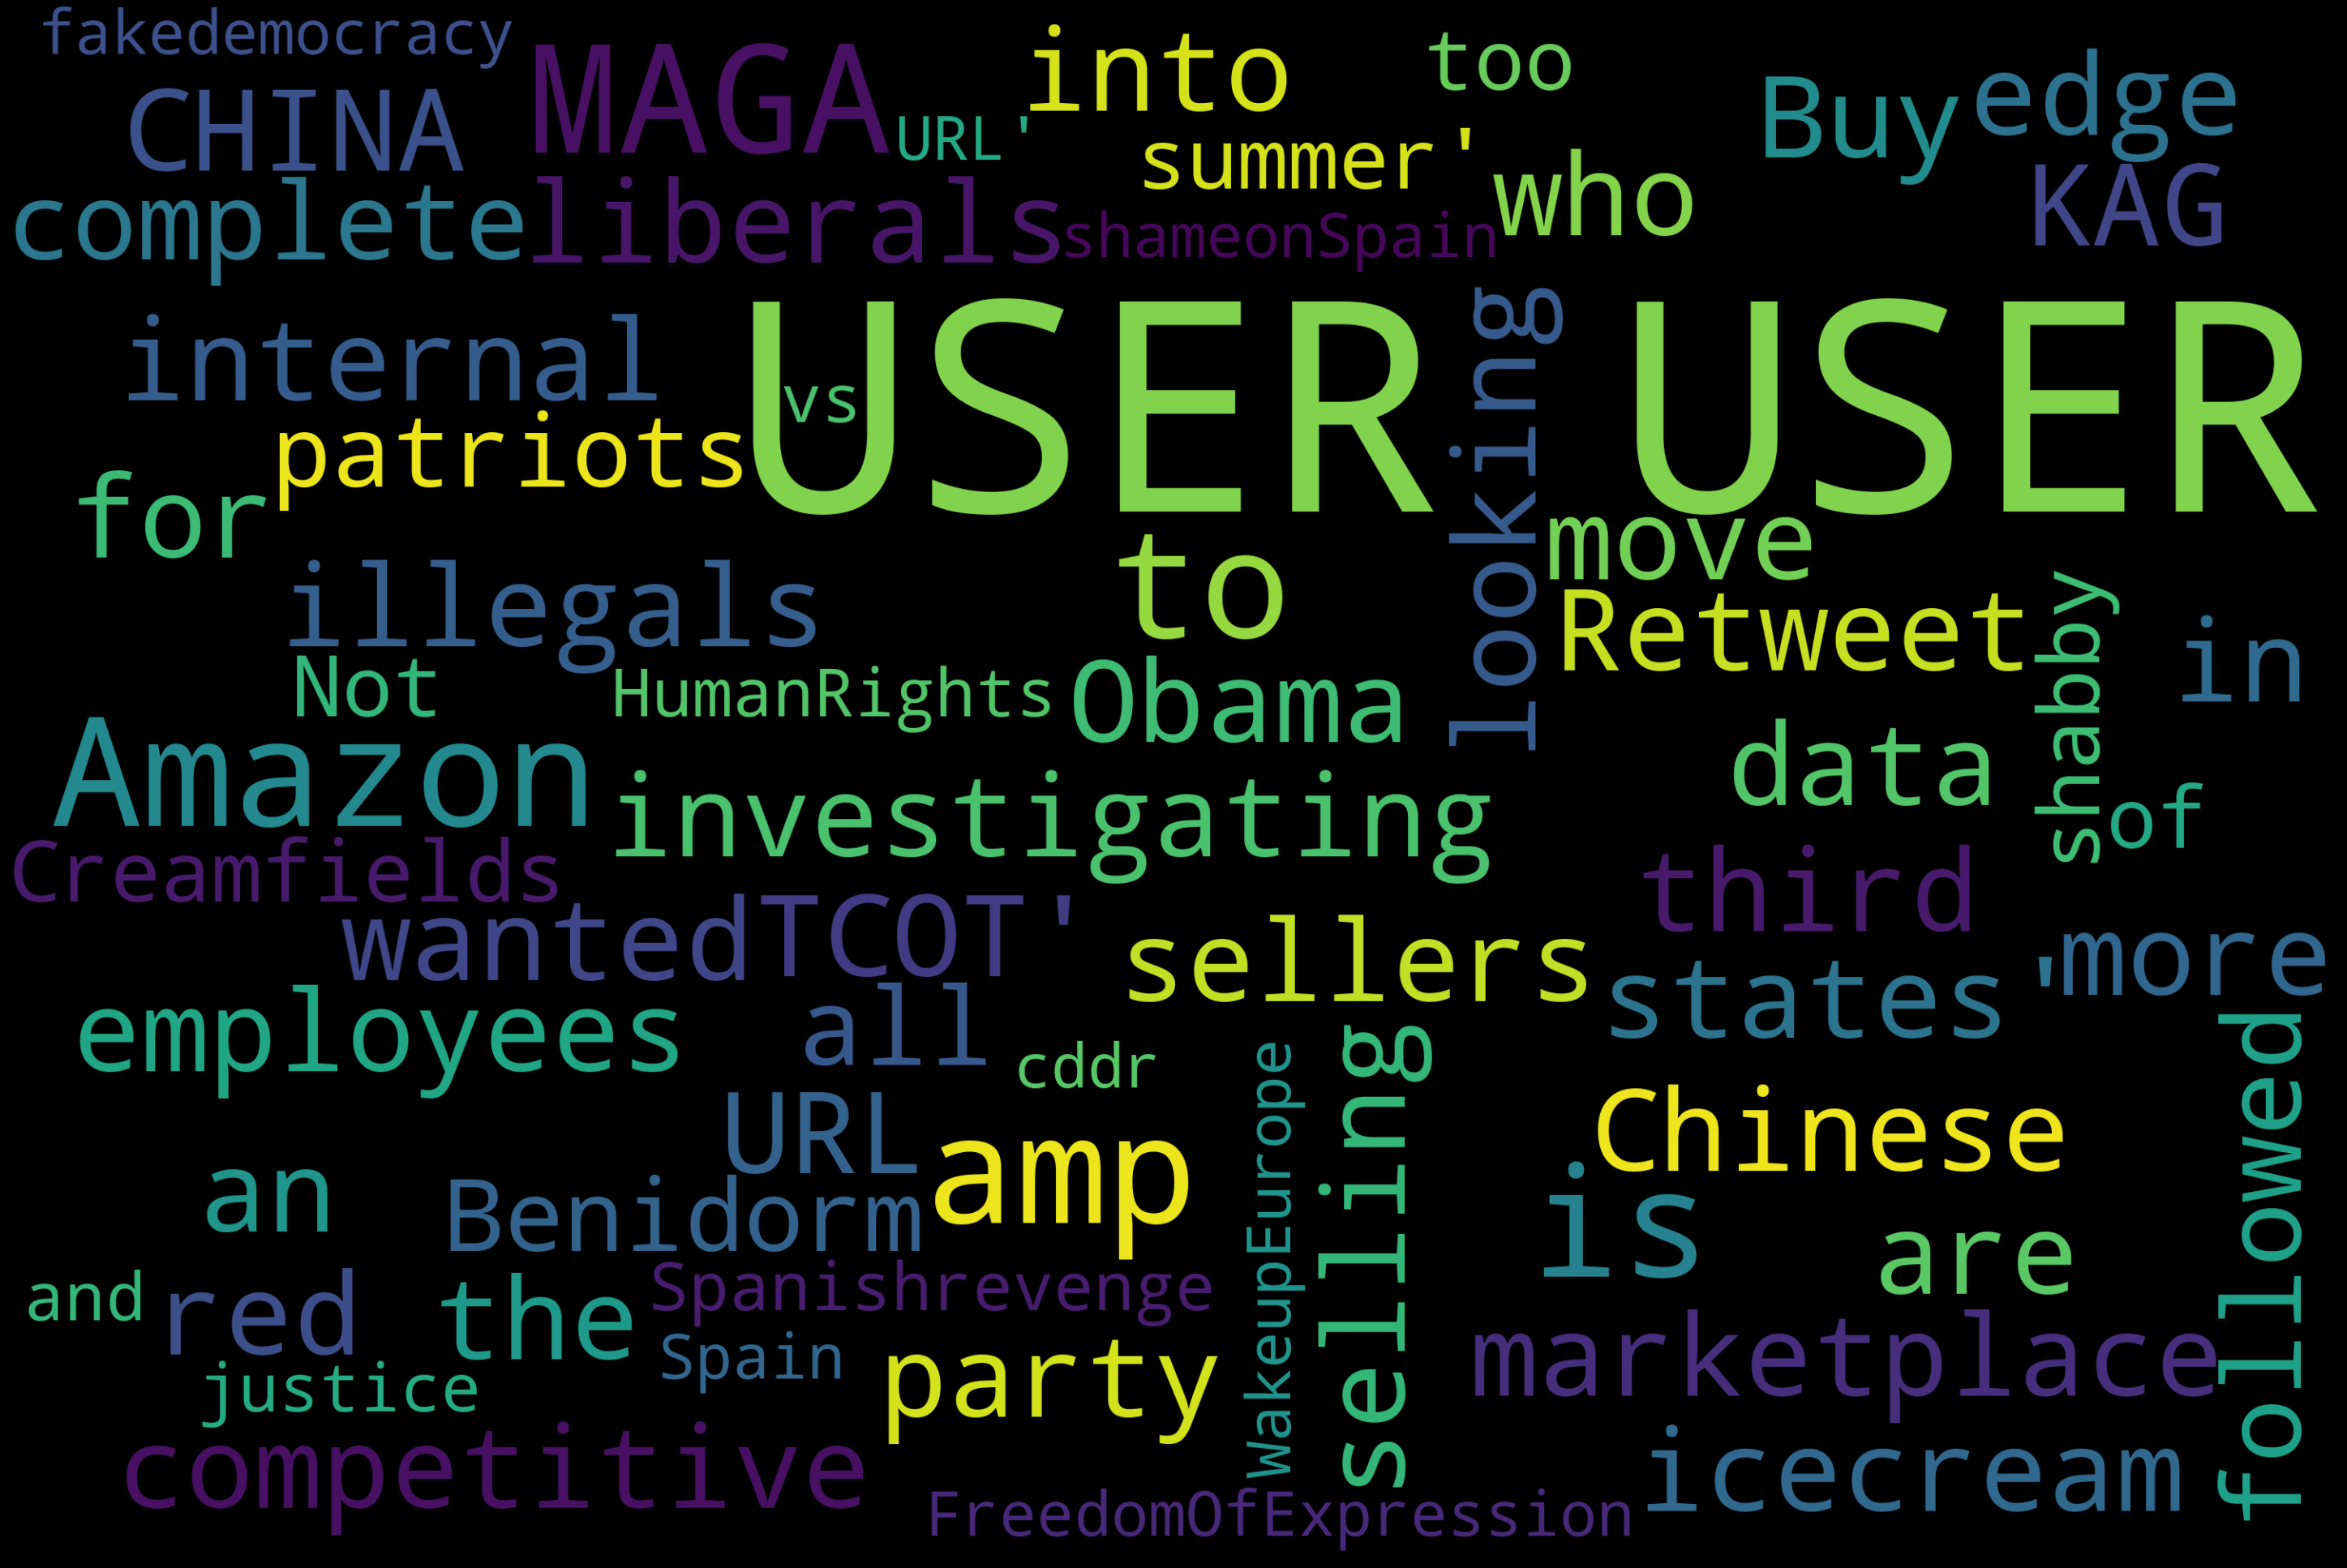

In [4]:
plot_word_cloud(NOT_OFFENSIVE)

word cloud for offensive posts

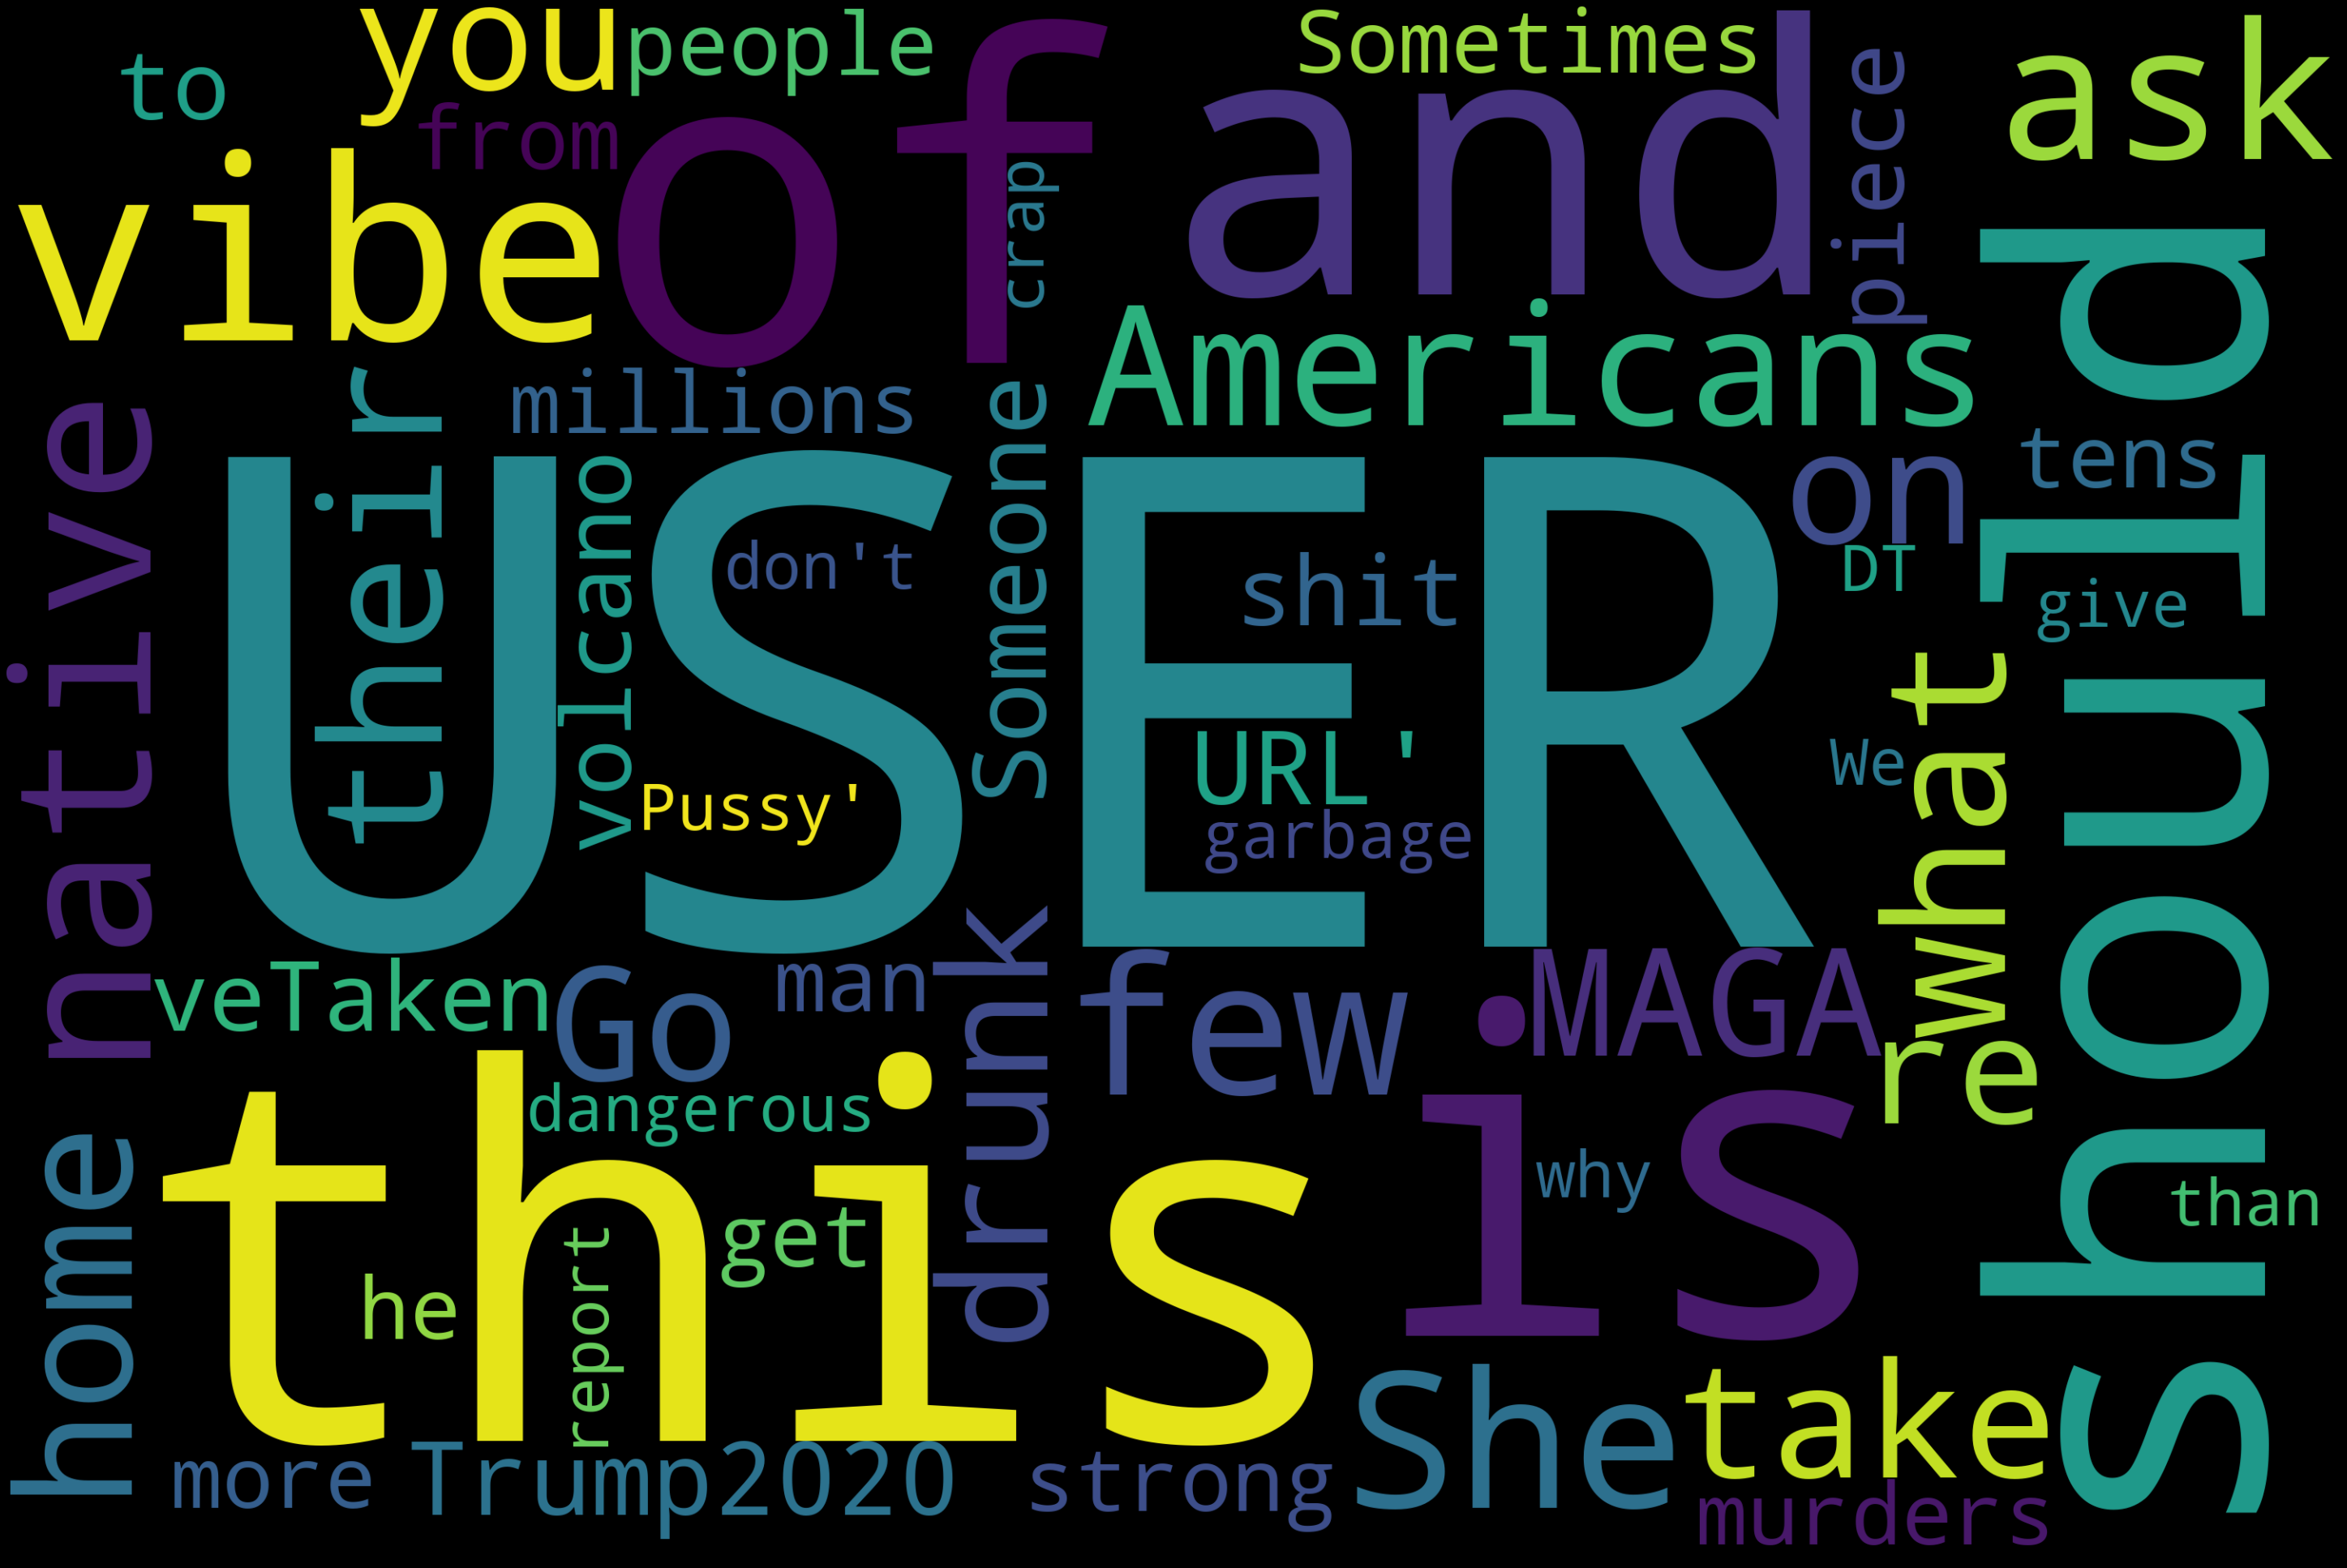

In [5]:
plot_word_cloud(OFFENSE)